In [ ]:
!pip install Bio

In [ ]:
!pip install transformers
!pip install tokenizers

In [ ]:
import google.colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import multiprocessing
processes=multiprocessing.cpu_count()
print(processes)

Mounted at /content/drive
2


In [ ]:
import argparse
import gzip
import os
import math
import re

import pandas as pd
import numpy as np

from Bio import SeqIO
from tokenizers import Tokenizer, models, trainers, normalizers
from transformers import PreTrainedTokenizerFast, AutoModel, AutoTokenizer

In [ ]:
def load_tokenizer(tokenizer_file):
  tokenizer = Tokenizer.from_file(tokenizer_file)
  return tokenizer

In [ ]:
def tokenize_sequences(data_path, tokenizer):
    # Read the file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Tokenize sequences and calculate number of tokens
    df['tokenized'] = df['sequence'].apply(lambda x: tokenizer.encode(x).tokens)
    df['number of tokens'] = df['tokenized'].apply(len)
    df['number of nucleotides']= df['sequence'].apply(len)
    df['fertility']=(df['number of tokens']*10)/df['number of nucleotides']
    return df


In [ ]:
#os.listdir('/content/drive/My Drive/')

In [ ]:
tokenizer_path = '/content/drive/My Drive/VOCABULARY_OUTPUT/bacteria_4096.json'
tokenizer = load_tokenizer(tokenizer_path)
file_path = '/content/drive/My Drive/GUE/mouse/0/train.csv'
df_with_tokens = tokenize_sequences(file_path, tokenizer)


In [ ]:
df_with_tokens['number of nucleotides']= df_with_tokens['sequence'].apply(len)

In [ ]:
df_with_tokens.head()

,sequence,label,tokenized,number of tokens,number of nucleotides,fertility
0,GTATGAGAGGGGGAGCGAGCGCCACTTCCCTGGAGGTGGAGGACAT...,0,"[GTATGA, GAGG, GGGA, GCGAGCGC, CACTT, CCC, TGG...",21,101,2.079208
1,AAACGTCAGCTCGCTTGCACTCATTCCATTTTGGACTTTGTGTAAA...,0,"[AAAC, GTCA, GCTC, GCTT, GCAC, TCATT, CCATTTT,...",20,101,1.980198
2,AGGAAGGTCCGACCCCCCCCCCAGCCCCGGGCCAGTCGGCGTCCCC...,0,"[A, GGAA, GGTCC, GACC, CCCCCC, CCA, GCCCC, GGG...",22,101,2.178218
3,AAAGCGTTGCGCACTTTTCCGCCATAGCGCCCGTTAGCCCCAAACA...,0,"[AAA, GCGTT, GCGCAC, TTTTCC, GCCA, TA, GCGCCC,...",21,101,2.079208
4,TGACACACCAGACCAACCTGAGGCTGCCAGCTCTCCCACCTCAGCT...,0,"[TGA, CACA, CCA, GACCAA, CC, TGAGGC, TGCCA, GC...",23,101,2.277228


In [ ]:
def calculate_statistics(df, results, tokenizer, dataset):
  # Calculate the minimum, maximum, mean, and standard deviation of the number of tokens and nucleotides
  min_tokens = df['number of tokens'].min()
  max_tokens = df['number of tokens'].max()
  mean_tokens = df['number of tokens'].mean()
  std_tokens = df['number of tokens'].std()

  min_nucleotides = df['number of nucleotides'].min()
  max_nucleotides = df['number of nucleotides'].max()
  mean_nucleotides = df['number of nucleotides'].mean()
  std_nucleotides = df['number of nucleotides'].std()

  min_fertility = df['fertility'].min()
  max_fertility = df['fertility'].max()
  mean_fertility = df['fertility'].mean()
  std_fertility = df['fertility'].std()

  # Print the results
  print(f"Number of Tokens - Min: {min_tokens}, Max: {max_tokens}, Mean: {mean_tokens}, Std: {std_tokens}")
  print(f"Number of Nucleotides - Min: {min_nucleotides}, Max: {max_nucleotides}, Mean: {mean_nucleotides}, Std: {std_nucleotides}")
  print(f"Fertility - Min: {min_fertility}, Max: {max_fertility}, Mean: {mean_fertility}, Std: {std_fertility}")

  results.append({
            'tokenizer': tokenizer,
            'dataset': dataset,
            'num_tokens_min': min_tokens,
            'num_tokens_max': max_tokens,
            'num_tokens_mean': mean_tokens,
            'num_tokens_std': std_tokens,
            'num_nuc_min': min_nucleotides,
            'num_nuc_max': max_nucleotides,
            'num_nuc_mean': mean_nucleotides,
            'num_nuc_std': std_nucleotides,
            'fertility_min': min_fertility,
            'fertility_max': max_fertility,
            'fertility_mean': mean_fertility,
            'fertility_std': std_fertility
        })
  return results

In [ ]:
tokenizers = ['yeast_4096.json', 'tokenizer_DNABERT2.json', 'mouse_4096.json', 'hg38_4096.json', 'bacteria_4096.json','gpt-tokenizer.json']
#tokenizers = ['bacteria_4096.json']

In [ ]:
datasets = ['virus/covid', 'tf/0', 'tf/1', 'tf/2', 'tf/3', 'tf/4', 'splice/reconstructed', 'prom/prom_core_tata', 'prom/prom_core_notata', 'prom/prom_core_all', 'prom/prom_300_tata', 'prom/prom_300_notata', 'prom/prom_300_all', 'mouse/0', 'mouse/1', 'mouse/2', 'mouse/3', 'mouse/4', 'EMP/H4ac', 'EMP/H4', 'EMP/H3K9ac', 'EMP/H3K79me3', 'EMP/H3K4me3', 'EMP/H3K4me2', 'EMP/H3K4me1', 'EMP/H3K4me1', 'EMP/H3K36me3', 'EMP/H3K14ac', 'EMP/H3']
#datasets = ['EMP/H4ac', 'EMP/H4', 'EMP/H3K9ac', 'EMP/H3K79me3', 'EMP/H3K4me3', 'EMP/H3K4me2', 'EMP/H3K4me1', 'EMP/H3K4me1', 'EMP/H3K36me3', 'EMP/H3K14ac', 'EMP/H3']

#datasets = ['tf/0', 'EMP/H4ac']

In [ ]:
results = []
for data in datasets:
  for t in tokenizers:
    print(data)
    print(t)
    tokenizer_path = '/content/drive/My Drive/VOCABULARY_OUTPUT/' + t
    #print(tokenizer_path)
    tokenizer = load_tokenizer(tokenizer_path)
    file_path = '/content/drive/My Drive/GUE/' + data + '/train.csv'
    #print(file_path)
    df_with_tokens = tokenize_sequences(file_path, tokenizer)
    print(df_with_tokens.size)
    results = calculate_statistics(df_with_tokens, results, t, data)
    print(f"data: {data}, tokenizer: {t}, tokens: {df_with_tokens['tokenized'][500]}, num_tokens: {df_with_tokens['number of tokens'][500]}, num_nts: {df_with_tokens['number of nucleotides'][500]}, fertility: {df_with_tokens['fertility'][500]} ")
    df_with_tokens.to_csv('/content/drive/My Drive/GUE/' + data+ "_" + t + '_fertility_df.csv', index=False)
results_df = pd.DataFrame(results)

virus/covid
yeast_4096.json
440010
Number of Tokens - Min: 181, Max: 226, Mean: 198.4878707302107, Std: 3.0280030513964813
Number of Nucleotides - Min: 999, Max: 999, Mean: 999.0, Std: 0.0
Fertility - Min: 1.8118118118118118, Max: 2.2622622622622623, Mean: 1.9868655728749811, Std: 0.030310340854819713
data: virus/covid, tokenizer: yeast_4096.json, tokens: ['AAAA', 'TCAGC', 'ACC', 'TTTAA', 'TTG', 'AATTG', 'TGCG', 'TGGATG', 'AGGC', 'TGG', 'TTCTAA', 'ATC', 'ACCC', 'ATTC', 'AGTAC', 'ATCG', 'ATATC', 'GGTAA', 'TTATAC', 'AGTTTCC', 'TGTT', 'TACC', 'TTTT', 'ACAATT', 'AATTGCC', 'AGGAACC', 'TAAATT', 'GGGTAG', 'TCTTG', 'TAG', 'TGCG', 'TTG', 'TTCGTTC', 'TATG', 'AAG', 'ACTTTT', 'TAG', 'AGTATC', 'ATGACG', 'TTCG', 'TGTTG', 'TTTT', 'AGATT', 'TTATC', 'TAAACG', 'AACAAAC', 'TTAAATG', 'TCTG', 'ATAATGG', 'ACCCC', 'AAAA', 'TCAGCG', 'AAATGC', 'ACTCC', 'GC', 'ATTACG', 'TTTGG', 'TGG', 'ACCC', 'TCAG', 'ATTCAAC', 'TGGC', 'AGTAACC', 'AGAATGG', 'AGAACGC', 'AGTG', 'GGGC', 'GCG', 'ATC', 'AAAAC', 'AACG', 'TCGG', 'CCCC

In [ ]:
results_df.to_csv('/content/drive/My Drive/GUE/fertility_statistics.csv', index=False)

In [ ]:
results_df

,tokenizer,dataset,num_tokens_min,num_tokens_max,num_tokens_mean,num_tokens_std,num_nuc_min,num_nuc_max,num_nuc_mean,num_nuc_std,fertility_min,fertility_max,fertility_mean,fertility_std
0,yeast_4096.json,virus/covid,181,226,198.487871,3.028003,999,999,999.000000,0.000000,1.811812,2.262262,1.986866,0.030310
1,tokenizer_DNABERT2.json,virus/covid,192,229,203.844522,3.886110,999,999,999.000000,0.000000,1.921922,2.292292,2.040486,0.038900
2,mouse_4096.json,virus/covid,190,233,203.681598,5.018439,999,999,999.000000,0.000000,1.901902,2.332332,2.038855,0.050235
3,hg38_4096.json,virus/covid,188,229,202.727783,4.617214,999,999,999.000000,0.000000,1.881882,2.292292,2.029307,0.046218
4,bacteria_4096.json,virus/covid,194,224,203.490202,3.026985,999,999,999.000000,0.000000,1.941942,2.242242,2.036939,0.030300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,tokenizer_DNABERT2.json,EMP/H3,58,115,103.129730,3.145610,290,500,499.966586,2.588236,1.760000,2.300000,2.062730,0.061960
170,mouse_4096.json,EMP/H3,58,118,103.200150,3.352382,290,500,499.966586,2.588236,1.800000,2.360000,2.064137,0.066114
171,hg38_4096.json,EMP/H3,60,115,102.606633,3.397363,290,500,499.966586,2.588236,1.800000,2.300000,2.052269,0.067092
172,bacteria_4096.json,EMP/H3,65,111,101.483251,2.630954,290,500,499.966586,2.588236,1.800000,2.241379,2.029813,0.051892


<ipython-input-29-f66126a9d1cd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results_df, x='fertility_mean', y='dataset', inner='stick', palette='Dark2')


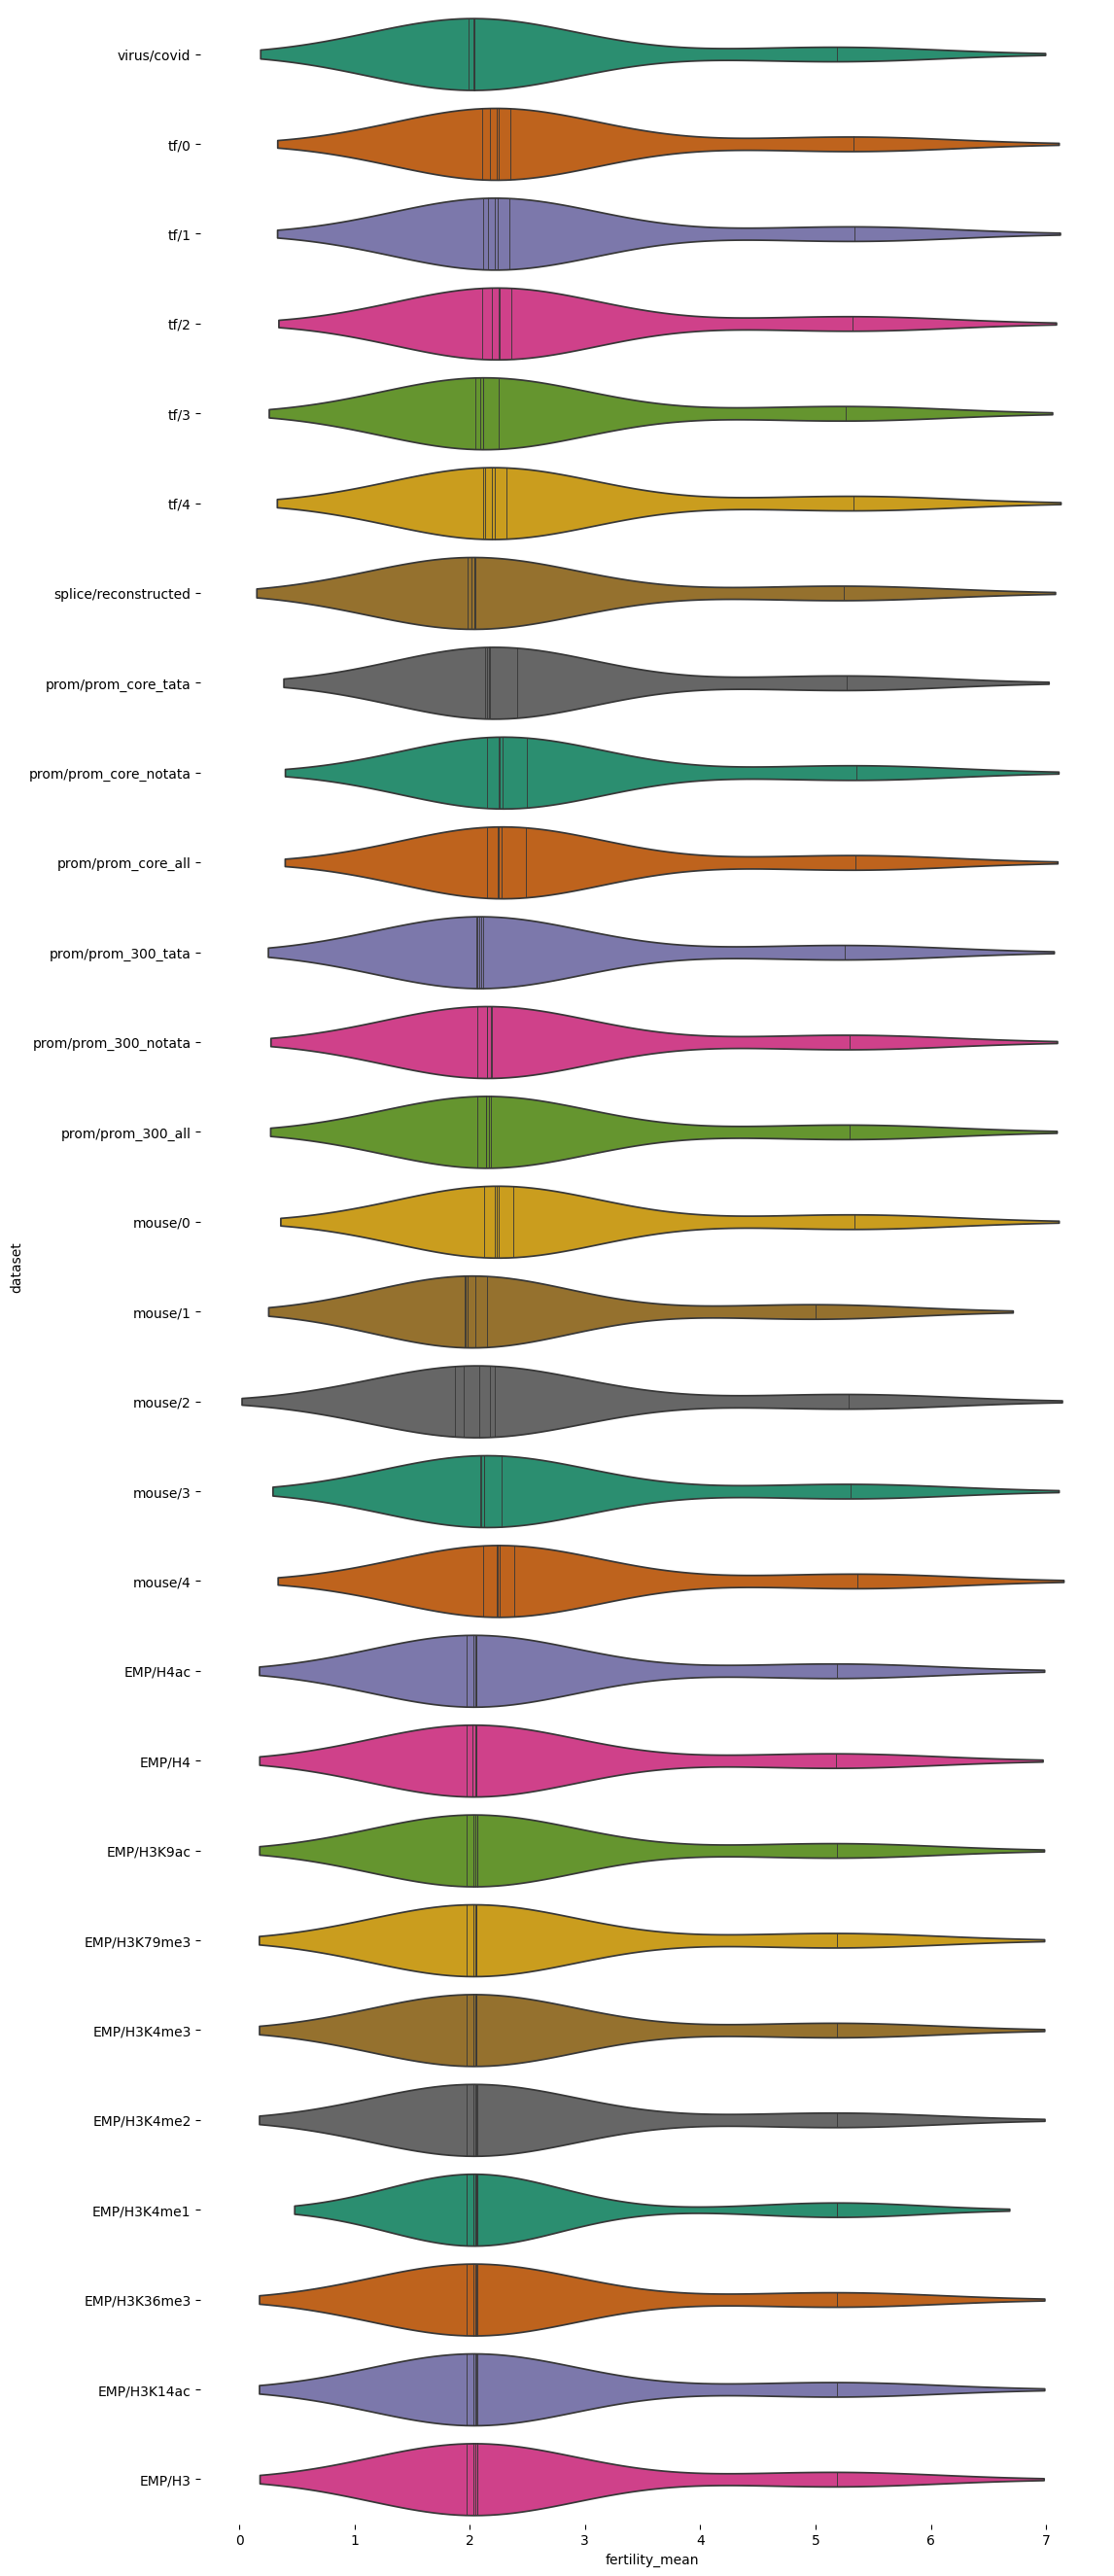

In [ ]:
# @title tokenizer vs num_tokens_mean

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['dataset'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='fertility_mean', y='dataset', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
results_df= pd.read_csv ('/content/drive/My Drive/GUE/fertility_statistics.csv')

# Define regex patterns for different formats
pattern_1 = r'^([\w]+)_\d+\.json$'  # For formats like yeast_4096.json
pattern_2 = r'^tokenizer_(\w+)\.json$'  # For formats like tokenizer_DNABERT2.json'

# Function to extract the base part using the appropriate regex pattern
def extract_base_name(filename):
    # Try pattern 1
    match = re.match(pattern_1, filename)
    if match:
        return match.group(1)
    # Try pattern 2
    match = re.match(pattern_2, filename)
    if match:
        return match.group(1)
    # Return the filename unchanged if no match
    return filename

# Apply the function to the 'tokenizer' column
results_df['labels'] = results_df['tokenizer'].apply(extract_base_name)

#results_df= results_df.sort_values(by='labels')




results_df



,tokenizer,dataset,num_tokens_min,num_tokens_max,num_tokens_mean,num_tokens_std,num_nuc_min,num_nuc_max,num_nuc_mean,num_nuc_std,fertility_min,fertility_max,fertility_mean,fertility_std,labels
0,yeast_4096.json,virus/covid,181,226,198.487871,3.028003,999,999,999.000000,0.000000,1.811812,2.262262,1.986866,0.030310,yeast
1,tokenizer_DNABERT2.json,virus/covid,192,229,203.844522,3.886110,999,999,999.000000,0.000000,1.921922,2.292292,2.040486,0.038900,DNABERT2
2,mouse_4096.json,virus/covid,190,233,203.681598,5.018439,999,999,999.000000,0.000000,1.901902,2.332332,2.038855,0.050235,mouse
3,hg38_4096.json,virus/covid,188,229,202.727783,4.617214,999,999,999.000000,0.000000,1.881882,2.292292,2.029307,0.046218,hg38
4,bacteria_4096.json,virus/covid,194,224,203.490202,3.026985,999,999,999.000000,0.000000,1.941942,2.242242,2.036939,0.030300,bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,tokenizer_DNABERT2.json,EMP/H3,58,115,103.129730,3.145610,290,500,499.966586,2.588236,1.760000,2.300000,2.062730,0.061960,DNABERT2
170,mouse_4096.json,EMP/H3,58,118,103.200150,3.352382,290,500,499.966586,2.588236,1.800000,2.360000,2.064137,0.066114,mouse
171,hg38_4096.json,EMP/H3,60,115,102.606633,3.397363,290,500,499.966586,2.588236,1.800000,2.300000,2.052269,0.067092,hg38
172,bacteria_4096.json,EMP/H3,65,111,101.483251,2.630954,290,500,499.966586,2.588236,1.800000,2.241379,2.029813,0.051892,bacteria


In [ ]:
#order_dict = {'emp_H3':60, 'emp_H3K14ac':61, 'emp_H3K36me3':62, 'emp_H3K4me1':63,
#       'emp_H3K4me2':64, 'emp_H3K4me3':65, 'emp_H3K79me3':66, 'emp_H3K9ac':67,
#       'emp_H4':68, 'emp_H4ac':69, 'human_tf_0':50, 'human_tf_1':51, 'human_tf_2':52,
#       'human_tf_3':53, 'human_tf_4':54, 'mouse_0':55, 'mouse_1':56, 'mouse_2':57,
#       'mouse_3':58, 'mouse_4':59, 'prom_300_all': 20, 'prom_300_notata':21,
#       'prom_300_tata':22, 'prom_core_all':25, 'prom_core_notata':26,
#       'prom_core_tata':27, 'splice_reconstructed':10, 'virus_covid':70,
#       'virus_species_40':0, 'fungi_species_20':0}
order_dict = {'virus/covid':70, 'tf/0':50, 'tf/1':51, 'tf/2':52, 'tf/3':53, 'tf/4':54,
       'splice/reconstructed':10, 'prom/prom_core_tata':27,
       'prom/prom_core_notata':26, 'prom/prom_core_all':25,
       'prom/prom_300_tata':22, 'prom/prom_300_notata':21, 'prom/prom_300_all':20,
       'mouse/0':55, 'mouse/1':56, 'mouse/2':57, 'mouse/3':58, 'mouse/4':59, 'EMP/H4ac':69,
       'EMP/H4':68, 'EMP/H3K9ac':67, 'EMP/H3K79me3':66, 'EMP/H3K4me3':65,
       'EMP/H3K4me2':64, 'EMP/H3K4me1':63, 'EMP/H3K36me3':62, 'EMP/H3K14ac':61,
       'EMP/H3':60}
results_df['order'] = results_df['dataset'].map(order_dict)

In [ ]:
#category_dict = {'emp_H3':'EMP', 'emp_H3K14ac':'EMP', 'emp_H3K36me3':'EMP', 'emp_H3K4me1':'EMP',
#       'emp_H3K4me2':'EMP', 'emp_H3K4me3':'EMP', 'emp_H3K79me3':'EMP', 'emp_H3K9ac':'EMP',
#       'emp_H4':'EMP', 'emp_H4ac':'EMP', 'human_tf_0':'TF', 'human_tf_1':'TF', 'human_tf_2':'TF',
#       'human_tf_3':'TF', 'human_tf_4':'TF', 'mouse_0':'TF', 'mouse_1':'TF', 'mouse_2':'TF',
#       'mouse_3':'TF', 'mouse_4':'TF', 'prom_300_all':'Promoters', 'prom_300_notata':'Promoters',
#       'prom_300_tata':'Promoters', 'prom_core_all':'Promoters', 'prom_core_notata':'Promoters',
#       'prom_core_tata':'Promoters', 'splice_reconstructed':'SS', 'virus_covid':'Virus',
#       'virus_species_40':'Virus', 'fungi_species_20':'Virus'}
category_dict = {'virus/covid':'Virus', 'tf/0':'TF', 'tf/1':'TF', 'tf/2':'TF', 'tf/3':'TF', 'tf/4':'TF',
       'splice/reconstructed':'SS', 'prom/prom_core_tata':'Promoter',
       'prom/prom_core_notata':'Promoter', 'prom/prom_core_all':'Promoter',
       'prom/prom_300_tata':'Promoter', 'prom/prom_300_notata':'Promoter', 'prom/prom_300_all':'Promoter',
       'mouse/0':'TF', 'mouse/1':'TF', 'mouse/2':'TF', 'mouse/3':'TF', 'mouse/4':'TF', 'EMP/H4ac':'EMP',
       'EMP/H4':'EMP', 'EMP/H3K9ac':'EMP', 'EMP/H3K79me3':'EMP', 'EMP/H3K4me3':'EMP',
       'EMP/H3K4me2':'EMP', 'EMP/H3K4me1':'EMP', 'EMP/H3K36me3':'EMP', 'EMP/H3K14ac':'EMP',
       'EMP/H3':'EMP'}
results_df['category'] = results_df['dataset'].map(category_dict)

In [ ]:
results_df = results_df[results_df['dataset'] != 'fungi_species_20']
results_df = results_df[results_df['dataset'] != 'virus_species_40']
results_df = results_df.sort_values(by='order')

In [ ]:
results_df['dataset'].unique()

array(['splice/reconstructed', 'prom/prom_300_all',
       'prom/prom_300_notata', 'prom/prom_300_tata', 'prom/prom_core_all',
       'prom/prom_core_notata', 'prom/prom_core_tata', 'tf/0', 'tf/1',
       'tf/2', 'tf/3', 'tf/4', 'mouse/0', 'mouse/1', 'mouse/2', 'mouse/3',
       'mouse/4', 'EMP/H3', 'EMP/H3K14ac', 'EMP/H3K36me3', 'EMP/H3K4me1',
       'EMP/H3K4me2', 'EMP/H3K4me3', 'EMP/H3K79me3', 'EMP/H3K9ac',
       'EMP/H4', 'EMP/H4ac', 'virus/covid'], dtype=object)

In [ ]:
results_df.describe()

,num_tokens_min,num_tokens_max,num_tokens_mean,num_tokens_std,num_nuc_min,num_nuc_max,num_nuc_mean,num_nuc_std,fertility_min,fertility_max,fertility_mean,fertility_std,order
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,51.896552,92.649425,80.476718,2.670598,235.482759,311.000000,310.994965,0.573906,1.951089,3.168543,2.635811,0.123060,50.827586
std,54.855256,79.233744,73.275967,1.189071,179.951751,227.309114,227.304904,0.779491,1.090656,1.306464,1.176169,0.064399,17.543477
min,6.000000,18.000000,14.952692,1.068625,70.000000,70.000000,70.000000,0.000000,0.594059,2.220000,1.872534,0.030300,10.000000
25%,15.000000,29.000000,22.383010,1.688237,101.000000,101.000000,101.000000,0.000000,1.386139,2.335000,2.049955,0.062469,50.000000
50%,45.000000,78.000000,64.410486,2.574511,290.000000,300.000000,300.000000,0.000000,1.698727,2.653300,2.117820,0.121258,57.000000
75%,62.000000,116.000000,102.590785,3.147072,310.000000,500.000000,499.989553,1.209881,1.800000,3.000000,2.257579,0.172423,63.000000
max,485.000000,535.000000,518.279716,6.016102,999.000000,999.000000,999.000000,2.588236,4.854855,6.633663,5.367258,0.408319,70.000000


In [ ]:
subset = results_df[results_df['tokenizer'] != 'gpt-tokenizer.json']
subset

,tokenizer,dataset,num_tokens_min,num_tokens_max,num_tokens_mean,num_tokens_std,num_nuc_min,num_nuc_max,num_nuc_mean,num_nuc_std,fertility_min,fertility_max,fertility_mean,fertility_std,labels,order,category
38,mouse_4096.json,splice/reconstructed,25,104,80.686897,3.607429,400,400,400.0,0.0,0.625000,2.600000,2.017172,0.090186,mouse,10,SS
39,hg38_4096.json,splice/reconstructed,25,99,79.381412,5.022871,400,400,400.0,0.0,0.625000,2.475000,1.984535,0.125572,hg38,10,SS
40,bacteria_4096.json,splice/reconstructed,50,93,81.962325,2.475512,400,400,400.0,0.0,1.250000,2.325000,2.049058,0.061888,bacteria,10,SS
37,tokenizer_DNABERT2.json,splice/reconstructed,27,98,81.682212,3.907501,400,400,400.0,0.0,0.675000,2.450000,2.042055,0.097688,DNABERT2,10,SS
36,yeast_4096.json,splice/reconstructed,25,100,81.751452,3.877068,400,400,400.0,0.0,0.625000,2.500000,2.043786,0.096927,yeast,10,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,tokenizer_DNABERT2.json,virus/covid,192,229,203.844522,3.886110,999,999,999.0,0.0,1.921922,2.292292,2.040486,0.038900,DNABERT2,70,Virus
2,mouse_4096.json,virus/covid,190,233,203.681598,5.018439,999,999,999.0,0.0,1.901902,2.332332,2.038855,0.050235,mouse,70,Virus
4,bacteria_4096.json,virus/covid,194,224,203.490202,3.026985,999,999,999.0,0.0,1.941942,2.242242,2.036939,0.030300,bacteria,70,Virus
3,hg38_4096.json,virus/covid,188,229,202.727783,4.617214,999,999,999.0,0.0,1.881882,2.292292,2.029307,0.046218,hg38,70,Virus


In [ ]:
subset['fertility_mean'].mean()

2.11356478242584

In [ ]:
subset['fertility_mean'].std()

0.11341208019299523

In [ ]:
gpt2 = results_df[results_df['tokenizer'] == 'gpt-tokenizer.json']

In [ ]:
gpt2['fertility_mean'].mean()

5.247039717690359

In [ ]:
gpt2['fertility_mean'].std()

0.08169308432228391

<ipython-input-43-0c8da7092942>:7: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=results_df, x='dataset', y='fertility_mean', hue='tokenizer', palette=cc, style='tokenizer',markers=True, dashes=False, markersize=10)


[<matplotlib.lines.Line2D object at 0x7aa54e2ce260>, <matplotlib.lines.Line2D object at 0x7aa54e2ce8f0>, <matplotlib.lines.Line2D object at 0x7aa54e375ea0>, <matplotlib.lines.Line2D object at 0x7aa54e3766b0>, <matplotlib.lines.Line2D object at 0x7aa54e2ce320>, <matplotlib.lines.Line2D object at 0x7aa54e2cd9c0>]
['gpt-tokenizer.json', 'mouse_4096.json', 'hg38_4096.json', 'bacteria_4096.json', 'tokenizer_DNABERT2.json', 'yeast_4096.json']


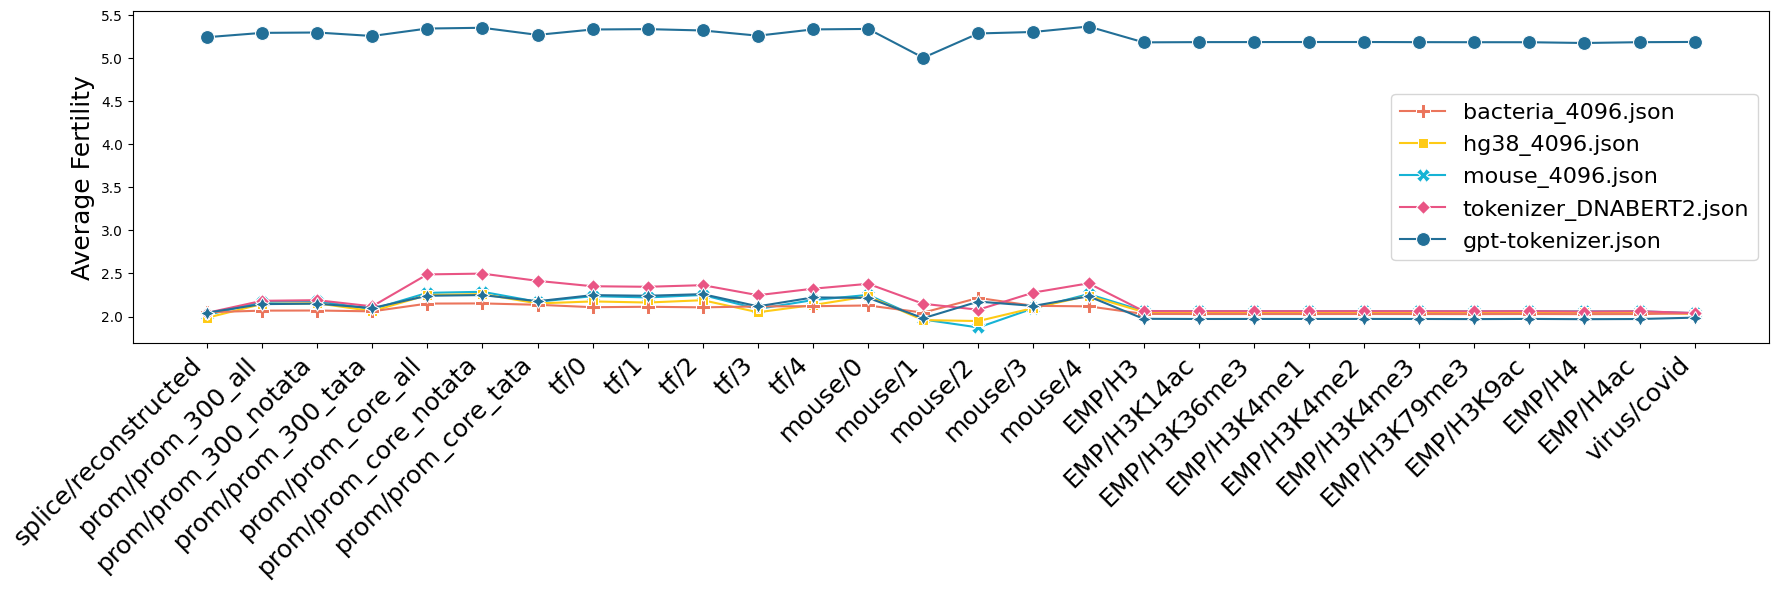

In [ ]:
plt.figure(figsize=(18, 6))  # Adjust the figure size if needed

# Use seaborn to create the scatter plot with different colors for each tokenizer
#sns.scatterplot(data=results_df, x='dataset', y='fertility_mean', hue='tokenizer', palette='Set1', s=100)
cc = ['#226f97', '#16b3d5', '#feca15', '#eb755c', '#e95484']

sns.lineplot(data=results_df, x='dataset', y='fertility_mean', hue='tokenizer', palette=cc, style='tokenizer',markers=True, dashes=False, markersize=10)
# Adjust labels and title
plt.xlabel('')
plt.ylabel('Average Fertility', fontsize=18)
#plt.title('Fertility Mean by Dataset and Tokenizer')
plt.xticks(rotation=45, ha='right',fontsize=18)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

print(handles)
print(labels)
#specify order of items in legend
order = [3,2,1,4,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=16)

# Optionally, adjust legend position
#plt.legend(loc='upper right', fontsize=16)

# Show plot
plt.tight_layout()  # Ensures labels are not cut off
plt.savefig('fertility_plus_gpt2.pdf', format='pdf',bbox_inches='tight')
plt.show()

[<matplotlib.lines.Line2D object at 0x7aa5708f3d00>, <matplotlib.lines.Line2D object at 0x7aa5708f3fd0>, <matplotlib.lines.Line2D object at 0x7aa570900280>, <matplotlib.lines.Line2D object at 0x7aa5709004f0>, <matplotlib.lines.Line2D object at 0x7aa570900760>]
['mouse_4096.json', 'hg38_4096.json', 'bacteria_4096.json', 'tokenizer_DNABERT2.json', 'yeast_4096.json']


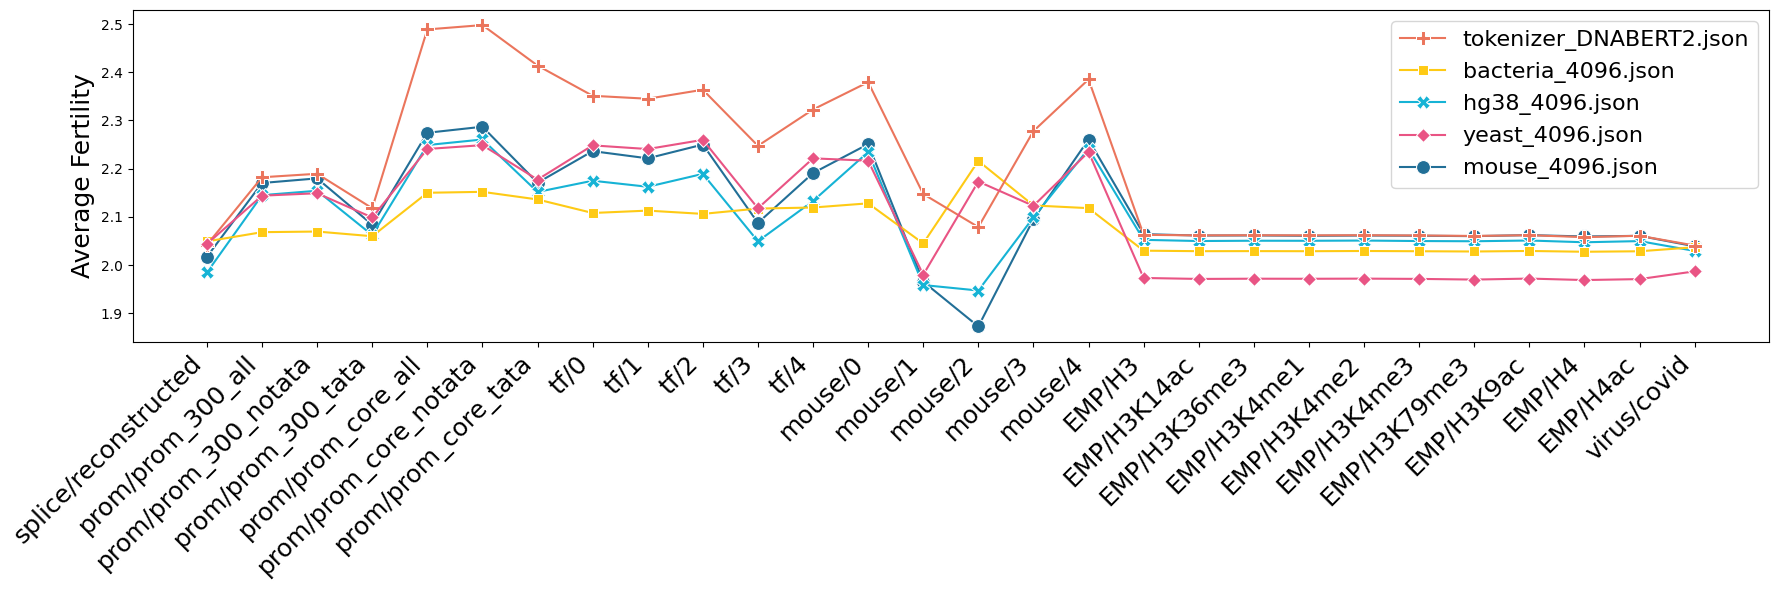

In [ ]:
plt.figure(figsize=(18, 6))  # Adjust the figure size if needed

# Use seaborn to create the scatter plot with different colors for each tokenizer
#sns.scatterplot(data=results_df, x='dataset', y='fertility_mean', hue='tokenizer', palette='Set1', s=100)
cc = ['#226f97', '#16b3d5', '#feca15', '#eb755c', '#e95484']

sns.lineplot(data=subset, x='dataset', y='fertility_mean', hue='tokenizer', palette=cc, style='tokenizer',markers=True, dashes=False, markersize=10)
# Adjust labels and title
plt.xlabel('')
plt.ylabel('Average Fertility', fontsize=18)
#plt.title('Fertility Mean by Dataset and Tokenizer')
plt.xticks(rotation=45, ha='right',fontsize=18)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

print(handles)
print(labels)
#specify order of items in legend
order = [3,2,1,4,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=16)

# Optionally, adjust legend position
#plt.legend(loc='upper right', fontsize=16)

# Show plot
plt.tight_layout()  # Ensures labels are not cut off
plt.savefig('fertility.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
sample_seq = 'GCTGGTCTCGAACTCCTGACCTCAAGTGATCCGCCTGCCTTGGCCTCCCAAAGTGCTGGGATTACAGGCATGAGCCACTGCGCCCGGCCGGGGATCTGAGT'
for t in tokenizers:
    print(t)
    tokenizer_path = '/content/drive/My Drive/VOCABULARY_OUTPUT/' + t

    tokenizer = load_tokenizer(tokenizer_path)
    result = tokenizer.encode(sample_seq).tokens
    print(result)
    num_nt = len(sample_seq)
    num_tokens = len(result)
    fertility=(num_tokens*10)/num_nt
    print(fertility)

#df['tokenized'] = df['sequence'].apply(lambda x: tokenizer.encode(x).tokens)
#df['number of tokens'] = df['tokenized'].apply(len)
#df['number of nucleotides']= df['sequence'].apply(len)
#df['fertility']=(df['number of tokens']*10)/df['number of nucleotides']

yeast_4096.json
['GCTGG', 'TCTCG', 'AACTCC', 'TGACC', 'TCAAG', 'TG', 'ATCCGCC', 'TGCC', 'TTGGCC', 'TCCC', 'AAAGTGC', 'TGGG', 'ATTAC', 'AGGC', 'ATG', 'AGCC', 'ACTGCG', 'CCC', 'GGCC', 'GGGG', 'ATC', 'TGAG', 'T']
2.277227722772277
tokenizer_DNABERT2.json
['[CLS]', 'GCTG', 'GTCTCGAA', 'CTCC', 'TGACC', 'TCAAGTGA', 'TCC', 'GCCTG', 'CCTT', 'GGCCTCCCAAA', 'GTGCTGGGATTACAGG', 'CATGA', 'GCCACTG', 'CGCC', 'CGGCC', 'GGGGA', 'TCTGA', 'GT', '[SEP]']
1.881188118811881
mouse_4096.json
['GC', 'TGG', 'TCTCG', 'AAC', 'TCCTG', 'ACCTC', 'AAGTG', 'ATCC', 'GCCTGCC', 'TTGGCC', 'TCCC', 'AAAG', 'TGCTGGG', 'ATT', 'ACAGGC', 'ATGAGCC', 'ACTGC', 'GCCC', 'GGCC', 'GGGG', 'ATCTGAG', 'T']
2.1782178217821784
hg38_4096.json
['GC', 'TGG', 'TCTCGAACTCCTGACCTC', 'AAGTGATCC', 'GCCTGCC', 'TTGGCCTCCCAAAGTGCTGGGATTACAGGC', 'ATGAGCC', 'ACTGC', 'GCCC', 'GGCC', 'GGGG', 'ATCTGAG', 'T']
1.2871287128712872
bacteria_4096.json
['GCTGG', 'TCTC', 'GAAC', 'TCC', 'TGACC', 'TCAA', 'GTGA', 'TCCGCC', 'TGCCTT', 'GGCC', 'TCCCAAA', 'GTGC', 'TGGG